# Math: Why age is so important.


A standard deviation (SD) is a random variable which has chi distribution.
If we are using any statistic which depends on SD, we should have a sufficient number of observations.
When we have a low number of observations SD vary at first. It have very diferent values and the statistic in question too.
So we need, say, 40 - 60 observations before SD converges to its real value.  Similarly for the mean. It depends on the data variability.

One observation is one trading day in our use case. 40-60 trading days is 2-3 months of data. 

But it also means that we are excluding systems which died within first 2-3 months of their life.

This does not necessarily mean any mistake. But when investigating i.e. Sharpe, we should have on mind, that there are two factors there: a Sharpe value and a strategy age which represents a number of observations.

Here is an example which shows how Mean and SD of the sample from the normal distribution N(5,3) gradually converge to 5 and 3 in time. It also shows how a formula, which uses those Mean and SD slowly converges and varies around its limit value. 

This example illustrates that we need enough observations for reliable calculations.

In [10]:
library(ggplot2)

In [93]:
options(repr.plot.width=12, repr.plot.height=10)

NConvergence = function(D, seed){
      # set seed to make example reproducible
      set.seed(seed)

      # Get a sample of D values from N(5,3)
      # It represents D daily returns of the trading strategy
      data = rnorm(D, 5, 3)
      meanArray = numeric(D)
      sdArray = numeric(D)
      ratioArray = numeric(D)

    # Start at 2 to avoid the NA value in the first calculations
    for (i in 2:D){
      # Get returns from day 1 to D
      timeData = data[1:i]
      # Calculate mean and SD
      m = mean(timeData) 
      s = sd(timeData) 
      # Store data for plotting
      meanArray[i] = m
      sdArray[i] = s
      ratioArray[i] = m / s
    }    
    return (data.frame(Index = 1:D, Mean = meanArray, SD = sdArray, Ratio = ratioArray))
}   


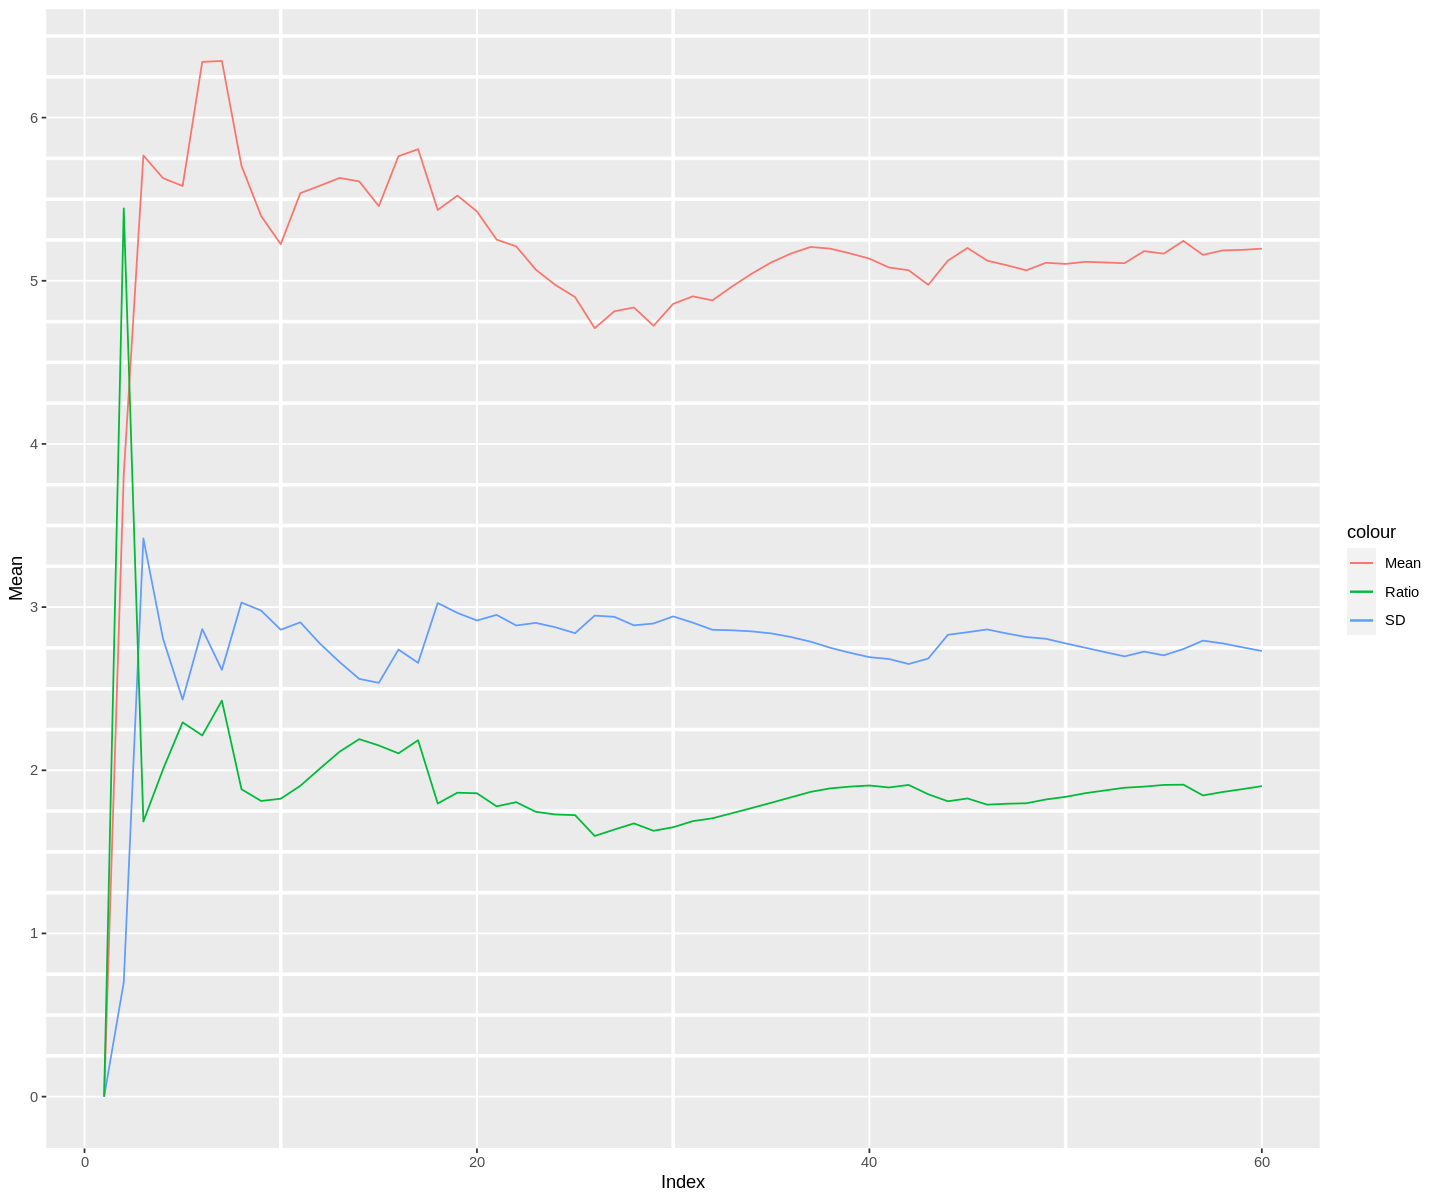

In [96]:

# 60 observations

data = NConvergence(60,123)
ggplot(data, aes(Index)) + 
  geom_line(aes(y = Mean, colour = "Mean")) + 
  geom_line(aes(y = SD, colour = "SD")) +  
  geom_line(aes(y = Ratio, colour = "Ratio")) +
  theme(panel.grid.minor = element_line(colour="white", size=1)) +
  scale_y_continuous(breaks = seq(0, 10, 1), minor_breaks = seq(0 , 10, 0.25))

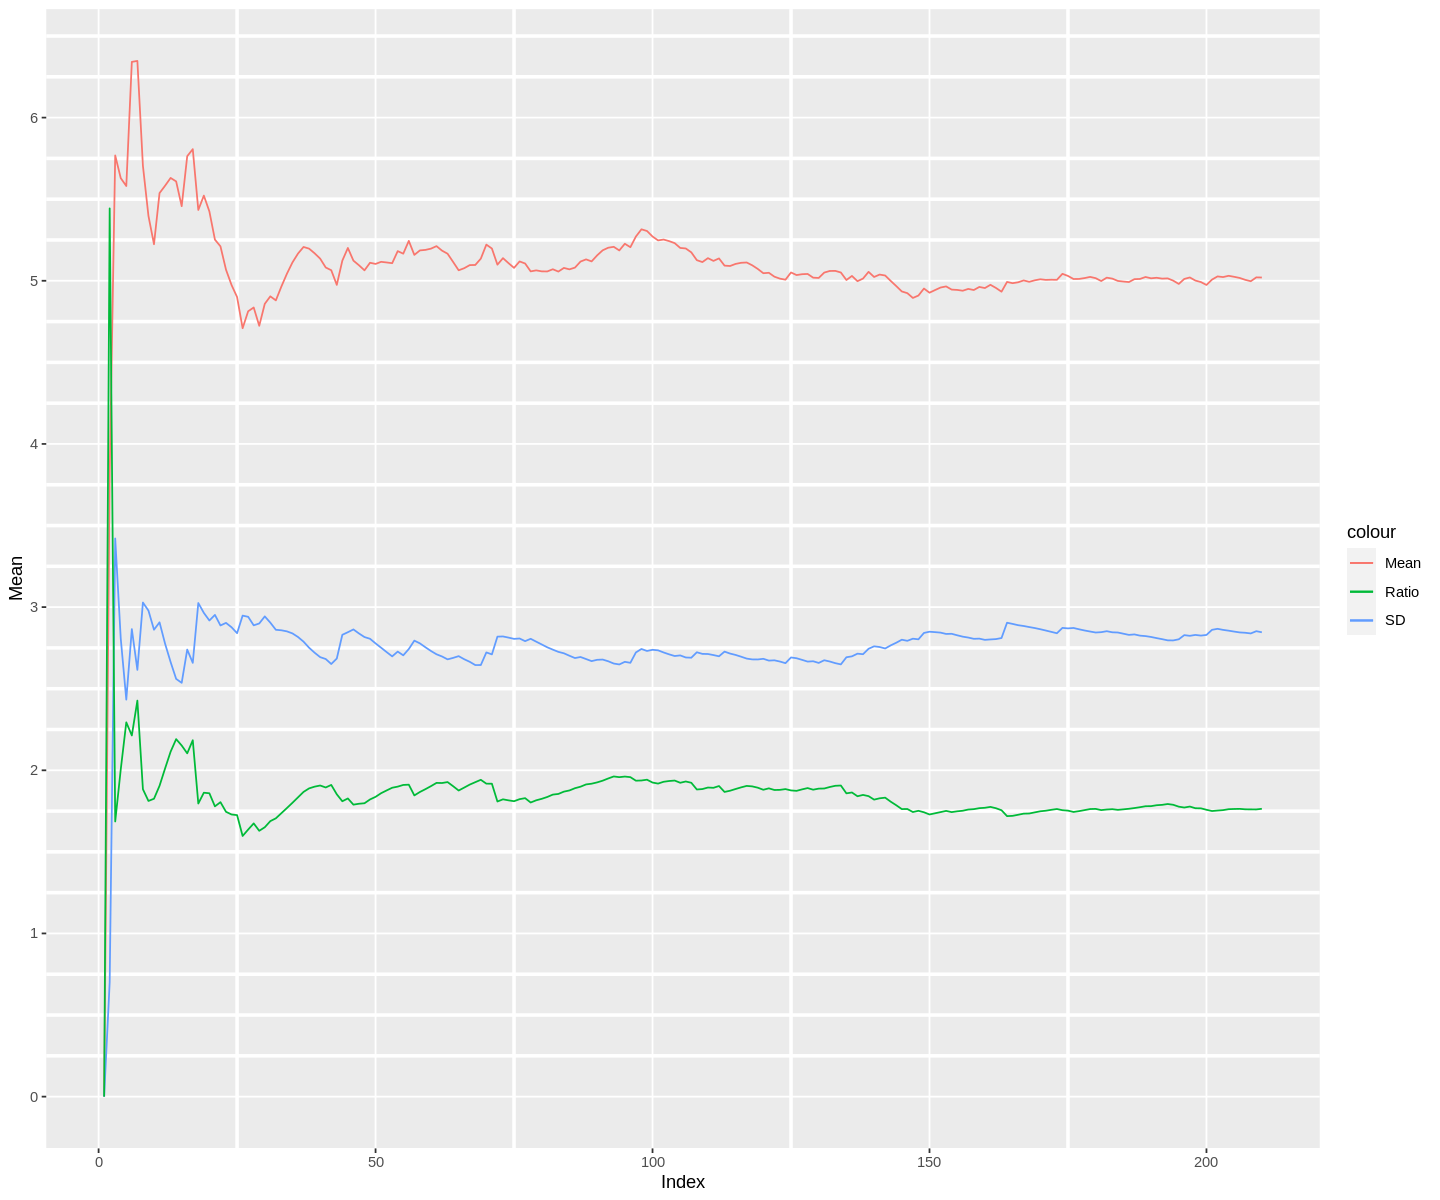

In [100]:

# 210 observations

data = NConvergence(210,123)
ggplot(data, aes(Index)) + 
  geom_line(aes(y = Mean, colour = "Mean")) + 
  geom_line(aes(y = SD, colour = "SD")) +  
  geom_line(aes(y = Ratio, colour = "Ratio")) +
  theme(panel.grid.minor = element_line(colour="white", size=1)) +
  scale_y_continuous(breaks = seq(0, 10, 1), minor_breaks = seq(0 , 10, 0.25))